<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Анализ рынка жилой недвижимости в Санкт-Петербурге

***Рынок недвижемости огромный. Одна из характеристик огромное количество информации.***

Необходимо в ней ориентироваться, выявлять закономерносити, взаимосвязи.

**Цель данной работы:** разработать параметры для определения рыночной стоимости объектов недвижимости.

**Ход исследования:**

Для анализа нам предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

  - __Проведем исследование по следующим этапам:__

     1. Обзор данных
     2. Обработка данных
     4. Рассчеты и добавление результатов в таблицу
     3. Исследовательский анализ данных
     5. Вывод
  

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t')

In [3]:
df.info()  # получение информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В таблице 23699 строк и 22 колонки

Тип данных в двух колонках bool, в четырнадцати колонках float64, в трех колонках int64, в трех колонках object

Нарушений стиля в наименовании колонок нет.
 
Только в восьми столбцах из двадцати двух нет пропусков.
 
Исследуем пропущенные значения и заполним, где это возможно.

## Предобработка данных

Посчитаем количество пропусков и изучим их для каждого столбца. 

In [5]:
df.isna().sum() #  посчитали пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Изучим столбец `ceiling_height`** методом `describe()`

Медианное значение не сильно отличается от среднего. Крайние значения 1 и 100.  Посчитаем строки с крайними значениями

In [6]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [7]:
print('Количество квартир, с высотой потолка 1м и менее - {} квартира'\
      .format(df.loc[df['ceiling_height'] <= 1]['ceiling_height'].count()))
print('Количество квартир, с высотой потолка до 2м - {} квартир'\
      .format(df.loc[df['ceiling_height'] <= 2]['ceiling_height'].count()))
print('Количество квартир, с высотой потолка 100м - {} квартира'\
      .format(df.loc[df['ceiling_height'] == 100]['ceiling_height'].count()))

print('Количество квартир, с высотой потолка больше 20м - {} квартиры'\
      .format(df.loc[df['ceiling_height'] > 20]['ceiling_height'].count()))

Количество квартир, с высотой потолка 1м и менее - 1 квартира
Количество квартир, с высотой потолка до 2м - 14 квартир
Количество квартир, с высотой потолка 100м - 1 квартира
Количество квартир, с высотой потолка больше 20м - 22 квартиры


Крайние значения единичны. Рассчитаем среднее для более реалистичных значений и заполним пропуски

In [8]:
ceilling_heit_mean = df.loc[(df['ceiling_height'] < 20) & (df['ceiling_height'] > 2)]['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(ceilling_heit_mean)

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(ceilling_heit_mean)

In [10]:
print('Пропуски в столбце ceiling_height равны ',df['ceiling_height'].isna().sum())

Пропуски в столбце ceiling_height равны  0


**Изучим столбцы `floors_total` и `floor`**

In [11]:
print('Доля пропусков в столбце floors_total {:.3f}%'.format(df['floors_total'].isna().mean()))  # посчитали долю пропусков

Доля пропусков в столбце floors_total 0.004%


В столбце `floor` нет пропусков, в столбце `floors_total` доля пропусков незначительная. Можно оставить их без изменения. В дальнейшем мы не используем данный столбец для анализа



Пропущенные значения в **столбце `balcony`** могут указывать на отсутсвие балконов. Заменим пропущененые значения нулем.

Изменим тип данных на числовой.

In [12]:
df['balcony'] = df['balcony'].fillna(0) # заменили значения

In [13]:
df['balcony'] = df['balcony'].astype('int') # изменили тип даных

**Столбец `is_apartment` содержит пропуски.** 

В столбце указаны булевы значения, можно предположить, что пропуски это значения `False` Если человек продаёт апартаменты, он скорее всего об этом знает и ответит утвердительно. Как правило, если значение слова неизвестно, графу пропускают.

Заменим пропуски, а также изменим тип данных с `int` на  `bool`

In [14]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(False) #  заменили значения

In [16]:
df['is_apartment'] = df['is_apartment'].astype('bool') #  изменили тип даных

**В столбце `first_day_exposition`** нет пропущенных значений, но необходимо изменить формат данных из строкового в datetime64

In [17]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #  изменили тип даных

**Изучим столбец `days_exposition`**  

Можно предположить, что пропущенные значения это ноль дней, объявление было размещено и сразу снято.
Можно предположить, что, когда данные выгружали, объявление еще было размещено. В данном случае мы не можем установить срок рамещения объявления. Известна дата публикации, но неизвестна дата снятия объявления.
Оставим пропущенные значения без изменений



**В столбцах `parks_around3000 `  `ponds_around3000`** одинаковое число пропущенных значений. 

Можно предположить, что если значение пропущенно парка или пруда в радиусе 3 км нет.

Данные, скорее всего, получены с помощью картографической съемки. При необходимости их можно уточнить

Данные цифры не используются в расчетах, оставим пропуски без изменений


 

**Изучим столбцы  `ponds_nearest`  `parks_nearest`** Более, чем в 60% процентах расстояние до ближайшего парка или пруда не указано. 

Мы не используем эту информацию в дальнейшем исследовании.

Оставим пропуски без изменений


**Изучим столбец `cityCenters_nearest`**  Постараемся избавится от пропусков.

Приведем названия населенных пунктов к единообразию:

-  заменим ё на е
-  сделаем все буквы строковыми

In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е').str.lower()

Выберем строки по одновременному условию название населенного пункта в столбце `locality_name` 

и пропущенные значения в столбце `cityCenters_nearest`

Расстояние между населенными пунктами найдем в *интернете* и подставим значения.

In [19]:
print(len(df.loc[(df['locality_name'] == 'поселок мурино') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'поселок мурино', 'cityCenters_nearest'] = 17000

554


In [20]:
print(len(df.loc[(df['locality_name'] == 'сертолово') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'сертолово', 'cityCenters_nearest'] = 37000

142


In [21]:
print(len(df.loc[(df['locality_name'] == 'деревня кудрово') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'деревня кудрово', 'cityCenters_nearest'] = 14000

299


In [22]:
print(len(df.loc[(df['locality_name'] == 'гатчина') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'гатчина', 'cityCenters_nearest'] = 47000

307


In [23]:
print(len(df.loc[(df['locality_name'] == 'коммунар') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'коммунар', 'cityCenters_nearest'] = 43000

89


In [24]:
print(len(df.loc[(df['locality_name'] == 'всеволожск') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'всеволожск', 'cityCenters_nearest'] = 28000

398


In [25]:
print(len(df.loc[(df['locality_name'] == 'выборг') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'выборг', 'cityCenters_nearest'] = 139000

237


In [26]:
print(len(df.loc[(df['locality_name'] == 'кировск') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'кировск', 'cityCenters_nearest'] = 47000

84


In [27]:
print(len(df.loc[(df['locality_name'] == 'деревня новое девяткино') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'деревня новое девяткино', 'cityCenters_nearest'] = 24000

144


In [28]:
print(len(df.loc[(df['locality_name'] == 'волхов') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'волхов', 'cityCenters_nearest'] = 134000

111


In [29]:
print(len(df.loc[(df['locality_name'] == 'тосно') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'тосно', 'cityCenters_nearest'] = 60000

104


In [30]:
print(len(df.loc[(df['locality_name'] == 'кудрово') & (df['cityCenters_nearest'].isna())]))
df.loc[df['locality_name'] == 'кудрово', 'cityCenters_nearest'] = 14000

173


Надо признать, что такой способ не очень эффективный.

Таким образом смогли исправить только часть пропусков.



**Изучим столбец `locality_name`**

Предположили, что название не указано, так как это Санкт-Петербург

Отфильтровали строки по имени Санкт-Петербург и посчитали медиану по столбцу  `cityCenters_nearest`

Далее выбрали строки с пропущеннымы значениями `locality_name`  и медианой столбца `cityCenters_nearest` заполнили часть пропущенных значений в столбце  `locality_name`

In [31]:
center_median = df.loc[df['locality_name'] == 'санкт-петербург']['cityCenters_nearest'].median() 

In [32]:
center_median = df.loc[df['locality_name'] == 'санкт-петербург']['cityCenters_nearest'].median() 
print('Количество строк для условия ', len(df.loc[(df['cityCenters_nearest'] <= center_median) & (df['locality_name'].isna())])) 

Количество строк для условия  26


In [33]:
df.loc[df['cityCenters_nearest'] <=center_median, 'locality_name'] = \
df.loc[df['cityCenters_nearest'] <=center_median, 'locality_name'].fillna('санкт-петербург')
#  заполнили пропуски

 - **Заполним пропуски** `living_area` и  `kitchen_area`
 
Пропуски в столбце `living_area` заполним медианой, рассчитаной в зависимости от количества комнат


In [34]:
living_area_1_room_med = df.loc[df['rooms'] == 1]['living_area'].median() # считаем медиану
living_area_2_room_med = df.loc[df['rooms'] == 2]['living_area'].median()
living_area_3_room_med = df.loc[df['rooms'] == 3]['living_area'].median()
living_area_3_5_room_med = df.loc[(df['rooms'] > 3) & (df['rooms'] <= 5)]['living_area'].median()
living_area_5_10_room_med = df.loc[(df['rooms'] > 5) & (df['rooms'] <= 10)]['living_area'].median()
living_area_high_10_room_med = df.loc[df['rooms'] >10]['living_area'].median()
print(living_area_1_room_med)
print(living_area_2_room_med)
print(living_area_3_room_med)
print(living_area_3_5_room_med)
print(living_area_5_10_room_med)
print(living_area_high_10_room_med)

17.6
30.5
45.0
68.0
139.9
201.0


In [35]:
df.loc[df['rooms'] == 1, 'living_area'] = df.loc[df['rooms'] == 1, 'living_area'].fillna(living_area_1_room_med)
df.loc[df['rooms'] == 2, 'living_area'] = df.loc[df['rooms'] == 2, 'living_area'].fillna(living_area_2_room_med)
df.loc[df['rooms'] == 3, 'living_area'] = df.loc[df['rooms'] == 3, 'living_area'].fillna(living_area_3_room_med)
df.loc[(df['rooms'] > 3) & (df['rooms'] <= 5), 'living_area'] = df.loc[(df['rooms'] > 3) & \
                                                    (df['rooms'] <= 5), 'living_area'].fillna(living_area_3_5_room_med)
df.loc[(df['rooms'] > 5) & (df['rooms'] <= 10), 'living_area'] = df.loc[(df['rooms'] > 5) & \
                                                    (df['rooms'] <= 10), 'living_area'].fillna(living_area_5_10_room_med)
df.loc[df['rooms'] > 10, 'living_area'] = df.loc[df['rooms'] > 10, 'living_area'].fillna(living_area_high_10_room_med)

In [36]:
df['living_area'].isna().sum()

14

Пропуски остались в 14 случаях

 - Изучим опсание столбца `rooms`

In [37]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Есть 197 квартир с 0 комнат

Посчитаем количество строк по условию
 - 0 комнат и пропущенные значения `kitchen_area`
 - 0 комнат и пропущенные значения `living_area`
 - и пропущенные значения `kitchen_area` и `living_area` одновременно
 
Можно предположить, что 0 комнат это 1 комната, по типу студии, где кухня не выделена, как отдельное помещение 

In [38]:
print(len(df.loc[(df['rooms'] == 0) & (df['kitchen_area'].isna())])) # считаем количество строк
print(len(df.loc[(df['rooms'] == 0) & (df['living_area'].isna())]))
print(len(df.loc[(df['living_area'].isna()) & (df['kitchen_area'].isna())]))

197
14
14


 - В строках, где 0 комнат и площадь кухни пропущена, приравняем площадь кухни к жилой. Также можно поступить и в отношении квартир студий с пропущенными значениями
 
 - оставшиеся 14 случаев приравняем к однокомнатным квартирам. Заполним медианой пропущенные значения жилой площади. И, думаю, жилую площадь можно также приравнять к площади кухни
 

In [39]:
df.loc[df['rooms'] == 0, 'kitchen_area'] = df['living_area']

In [40]:
print('Количество квартир-студий с пропущенным значением kitchen_area:', \
      (len(df.loc[(df['studio'] == True) & (df['kitchen_area'].isna())])))

Количество квартир-студий с пропущенным значением kitchen_area: 21


In [110]:
df.loc[df['studio'] == True, 'kitchen_area'] = df['living_area']
print('Количество квартир-студий с пропущенным значением kitchen_area:', \
      (len(df.loc[(df['studio'] == True) & (df['kitchen_area'].isna())])))

Количество квартир-студий с пропущенным значением kitchen_area: 0


In [42]:
len(df.loc[(df['rooms'] == 0) & (df['kitchen_area'].isna())])

14

In [43]:
df.loc[df['rooms'] == 0, 'rooms'] = 1
df.loc[df['rooms'] == 1, 'living_area'] = df.loc[df['rooms'] == 1, 'living_area'].fillna(living_area_1_room_med)

In [44]:
df['living_area'].isna().sum() # пропуски в столбце living_area заполнены полностью

0

Пропуски в жилой площади заполнили медианным значение, в зависимости от количества комнат.
Пропуски в площади кухни также частично заполнили.
Можно, конечно, заполнить оставшиеся пропуски медианой, рассчитаной по количеству комнат. Но может быть, площадь кухни не указана, потому что она не выделена, как отдельное помещение, как например "евротрешки",  "евродвушки".
Корректо ли будет заполнять пропущенные значения?    
Вычесть из общей площади жилую, для нахождения площади кухни, мы также не можем, так как в общую площадь входит и жилая площадь, и площадь кухни, и санузел, и коридор, кладовка, перегородки.  


 -  Проверим результаты

In [45]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2084
balcony                     0
locality_name              23
airports_nearest         5542
cityCenters_nearest      2877
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [46]:
df.dtypes # посмотрели типы данных

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object




 - Сделаем проверку на дубликаты

In [47]:
df.duplicated().sum() #  проверили на дубликаты

0

**Вывод**

На этапе предобработки данных
 - Заполнили пропуски, где это было возможно. Некоторые столбцы с пропусками оставили без изменений, так как они не используются в дальнейшей работе.
 - Изменили типы данных.
 - Проверили дубликаты.

## Расчёты и добавление результатов в таблицу

 -  Для дальнейшего исследования создадим на основе исходной - таблицу с меньшим количеством колонок.
 

 -  Оставим колонки, которые необходимы для последующего анализа.

In [48]:
df_other = df.drop(columns=['ponds_nearest', 'ponds_around3000', 'parks_nearest', 'parks_around3000', 'airports_nearest', 'balcony', 'open_plan', 'studio', 'is_apartment', 'total_images'])
# создали новый датафрейм

In [49]:
df_other.info()  # изучили информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  float64       
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        23699 non-null  float64       
 5   floors_total          23613 non-null  float64       
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   kitchen_area          21615 non-null  float64       
 9   locality_name         23676 non-null  object        
 10  cityCenters_nearest   20822 non-null  float64       
 11  days_exposition       20518 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 2.2+ M

In [50]:
df_other.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition
0,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,25.0,санкт-петербург,16028.0,NaN
1,3350000.0,40.4,2018-12-04,1,2.730129,11.0,18.6,1,11.0,поселок шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20,2,2.730129,5.0,34.3,4,8.3,санкт-петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0


 - А также рассчитаем и добавим в таблицу дополнительные столбцы
 

    - цену кватратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры, варианты - первый, последний, другой
    - соотношение площади кухни к общей площади, а также соотношение жилой площади к общей

In [51]:
df_other['weekday_exposition'] = df_other['first_day_exposition'].dt.weekday #  добавили день, месяц и год публикации объявления
df_other['month_exposition'] = df_other['first_day_exposition'].dt.month
df_other['year_exposition'] = df_other['first_day_exposition'].dt.year

In [52]:
df_other.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition
0,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,25.0,санкт-петербург,16028.0,NaN,3,3,2019
1,3350000.0,40.4,2018-12-04,1,2.730129,11.0,18.6,1,11.0,поселок шушары,18603.0,81.0,1,12,2018
2,5196000.0,56.0,2015-08-20,2,2.730129,5.0,34.3,4,8.3,санкт-петербург,13933.0,558.0,3,8,2015
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0,4,7,2015
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0,1,6,2018


In [53]:
df_other['mid_price_metr'] = df_other['last_price'] / df_other['total_area'] # рассчитали стоимость квадратного метра

In [54]:
def position_floor_variant(row):                    # написали функцию для рассчета вариантов этажей
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'

row_values = [8, 16]
             
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
print(position_floor_variant(row))



другой


In [55]:
df_other['floor_variant'] = df_other.apply(position_floor_variant, axis=1)  # сформировали столбец на основе работы функции

In [56]:
df_other['kitchen_total_area'] = round(df_other['kitchen_area'] / df_other['total_area'], 2) # соотношение площади кухни и общей

In [57]:
df_other['living_total_area'] = round(df_other['living_area'] / df_other['total_area'], 2)  # соотношение площади жилой и общей

In [58]:
df_other.head() # проверили результат

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,mid_price_metr,floor_variant,kitchen_total_area,living_total_area
0,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,25.0,санкт-петербург,16028.0,NaN,3,3,2019,120370.370370,другой,0.23,0.47
1,3350000.0,40.4,2018-12-04,1,2.730129,11.0,18.6,1,11.0,поселок шушары,18603.0,81.0,1,12,2018,82920.792079,первый,0.27,0.46
2,5196000.0,56.0,2015-08-20,2,2.730129,5.0,34.3,4,8.3,санкт-петербург,13933.0,558.0,3,8,2015,92785.714286,другой,0.15,0.61
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0,4,7,2015,408176.100629,другой,NaN,0.28
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0,1,6,2018,100000.000000,другой,0.41,0.32


**Вывод**

- Удрали столбцы, которые не используем в анализе
- Добавили новые столбы с рассчетами:
    - цена кватратного метра
    - выделили день недели, месяц и год публикации объявления
    - создали категоризацию этажей - первый, последний, другой
    - посчитали соотношение площади кухни к общей площади, а также соотношение жилой площади к общей

## Исследовательский анализ данных

   - Изучим параметры: 
    
     - площадь 
     - цена 
     - число комнат 
     - высота потолков
   

   - Построим гистограммы для каждого параметра

Сначала получим числовое описание данных методом `describe()` для каждого параметра    <a id='area'></a>

In [59]:
df_other['total_area'].describe() # изучим площадь  

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Крайние значения в столбце сильно отличаются. Максимальное значение сильно контрастирует с остальными характеристиками.

Средние значение немного больше медианного. Стандартное отклонение невысокое

Можно сказать, что данные достаточно однородные, выбросы единичное явление.

Зададим диапзон от 12 до 200, это вполне реалистичные цифры.

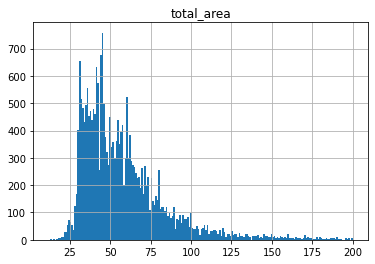

In [60]:
df_other.hist('total_area', bins=200, range=(12, 200));

Вывод

Квартир с площадью от 100 до 200 квадратных метров небольшое количество

От 30 до 80 квадратных метров больше. Уменьшается площадь, увеличивается количество.

Основная масса квартир на рынке площадью от 30 до 40 кватратных метров

Чем меньше площадь, тем большее количество квартир на рынке продаж     



In [61]:
df_other['last_price'].describe() # изучим параметр цена

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Показатель стоимости  демострирует сильный контраст в крайних значениях

По величине стандартного отклонения можем сказать о сильных выбросах

Выбросы повлияли на среднее значение. Среднее превышает медиану примерно на треть.

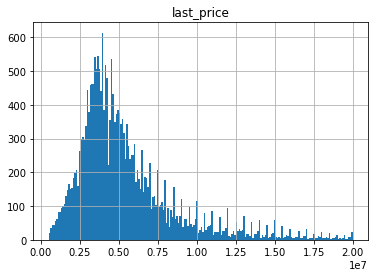

In [62]:
df_other.hist('last_price', bins=200, range=(500000, 20000000));

Вывод

Квартиры по стоимости от 10 млн до 20 млн немногочислены, но  все же явно присутствуют. Отдельные всплески достигают по количеству квартиры со стоимостью до 500 тысяч.

Активнее всего представлены квартиры стоимостью от 3 до 4 млн

Ниже по частотности квартиры от 2,5 млн до 5 млн, следующая по убыванию группа от 1 млн до 7,5 млн

На рынке чаще представлено среднее по стоимости жилье. Чем больше цена отличается от средней, тем реже предложения о продаже.

In [63]:
df_other['rooms'].describe() # изучим параметр количество комнат

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В описательной характеристике столбца средние значение почти совпадает с медианным

Стандартное отклонение указывает на присутствие выбросов.

<a id='rooms'></a>

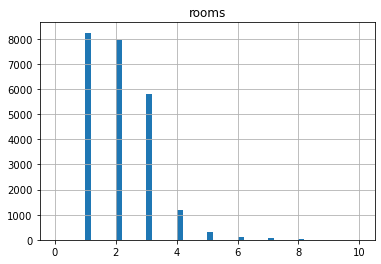

In [64]:
df_other.hist('rooms', bins=50, range=(0, 10));

Вывод

По гистограмме сразу очевидно - больше всего и в равной степени предложений о продаже 1 и 2 комнатных квартир.

Примерно, на 30 процентов меньше в продаже 3 комнатных квартир.
Далее прослеживается закономерность, чем больше комнат, тем меньше предложений о продаже.

Встречаются объявления с нулем жилых комнат, но в небольшом количестве.



In [65]:
df_other['ceiling_height'].describe() # изучим параметр высота потолков

count    23699.000000
mean         2.755448
std          0.986729
min          1.000000
25%          2.600000
50%          2.730129
75%          2.730129
max        100.000000
Name: ceiling_height, dtype: float64

Максимальная и минимальная высота сильно отличаются. Но такие значения единичны.

Медиана равна среднему. Стандартное отклонение, примерно, 30 процентов от данных значений

Изначально около трети значений было пропущено. Их заменили на медиану.

Это объясняет однородность значений.

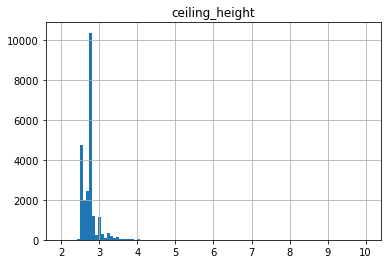

In [66]:
df_other.hist('ceiling_height', bins=100, range=(2, 10));

Вывод

Основная масса квартир  с высотой потолков 2,7 метра.

Высота 2,5 метра также довольно типичное явление.

А вот с высотой от 2.9 метра и более встречаемость заметно падает

Квартир с высотой потолков 3 метра 4 метра очень мало на рынке.




 - **Изучим время продажи квартиры**

In [67]:
df_other['days_exposition'].describe() # получим описание столбца

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение в два раза превышает медиану. Стандартное отклонение очень большое.

Это указывает, что выборка очень неоднородна. 

Можно отбросить значения за квартилями. 

Интересно узнать как часто встречаются крайние значения. Запросим и посчитаем строки.

In [68]:
print(len(df_other.loc[df_other['days_exposition'] <= 1])) # 3181 значение было пропущено, заменили на 0
print(len(df_other.loc[df_other['days_exposition'] == 2]))  # число объявлений со сроком публикации 2 дня
print(len(df_other.loc[df_other['days_exposition'] == 3]))  #
print(len(df_other.loc[df_other['days_exposition'] >= 550]))  #
print(len(df_other.loc[df_other['days_exposition'] >= 730]))  #

1
3
0
1471
751


От трех дней количество объявлений начинает расти

А по истечении 2 лет уменьшается

Учитывая числовое описание столбца и результаты запроса строк зададим параметры для гистограмьы

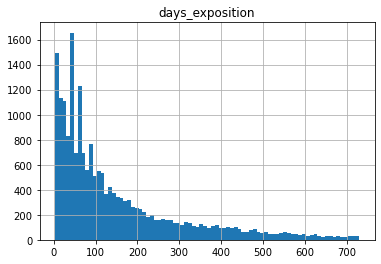

In [69]:
df_other.hist('days_exposition', bins=80, range=(3, 730));

Вывод

Если считать, что объявление снимают, когда квартира продана, то обычно продажа состоится в течении двух месяцев

Достаточно типичны продажи в течении недели

В течении от года до полутора, квартира, как правило бывает продана.

Затянутые сроки продаж менее частотно представлены в выборке.

То есть, чем длительнее срок объявления, тем меньше количество таких объявлений.

Если продажи прошли в течении недели, можно говорить о быстрой продаже. В числовой характеристике указано максимальное значение  1580 дней, четыре с лишним года, это очень длительная продажа. 

Пики, скорее всего, указывают на дни автоматического снятия объявления с публикации. В данной гистиограмме это неделя, месяц, 2 месяца.



  -  **Изучим факторы влияющие на стомость квартиры.**

Рассмотрим соотношение

  -  цены и площади
  -  цены и числа комнат
  -  цены и удаленности от центра
  
  Рассчитаем коэффициент корреляции и построим матрицу диаграмм рассеяния по этими величинами
  
  Отберем в отдельную таблицу столбцы с нужными данными.

In [70]:
df_other_cor = df_other[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']] 
df_other_cor.head()

,total_area,rooms,cityCenters_nearest,last_price
0,108.0,3,16028.0,13000000.0
1,40.4,1,18603.0,3350000.0
2,56.0,2,13933.0,5196000.0
3,159.0,3,6800.0,64900000.0
4,100.0,2,8098.0,10000000.0


In [71]:
df_other_cor.corr()  # считаем коэффициент

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.760233,-0.140832,0.653675
rooms,0.760233,1.000000,-0.091518,0.365209
cityCenters_nearest,-0.140832,-0.091518,1.000000,-0.156048
last_price,0.653675,0.365209,-0.156048,1.000000


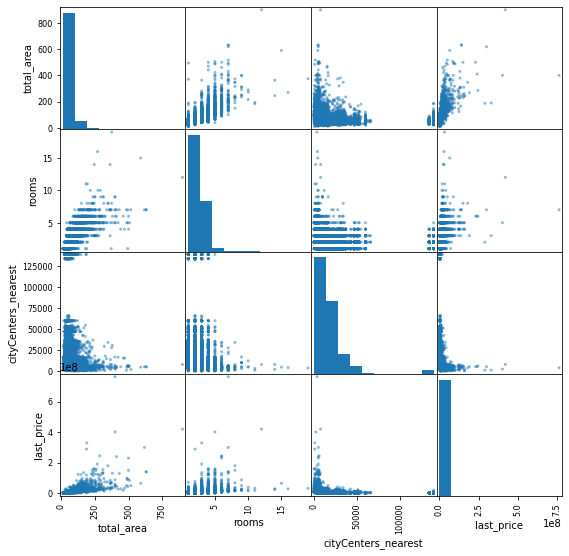

In [72]:
pd.plotting.scatter_matrix(df_other_cor, figsize=(9, 9));

Вывод

В соотношении цены и площади корреляция положительная, выше среднего. Чем больше площадь квартиры, тем выше цена. 

В соотношении количества комнат и цены корреляция положительная, но ниже среднего. 1 комнатная квартира может по площади не уступать и 3 комнатной

Соотношение цены и удаленности от центра характеризуется отрицательной, слабой корреляцией. Чем дальше от центра, тем ниже цена. Но зависимость минимальная.

<a id='correl'></a>



   - **Изучим зависимость цены от того на каком этаже расположена квартира**

Ранее мы создали столбец с категориями этажей
 - другой
 - первый
 - последний
 
Построим график на основе рассчета сводной таблицы. Изучим зависимость цены от этажа квартиры

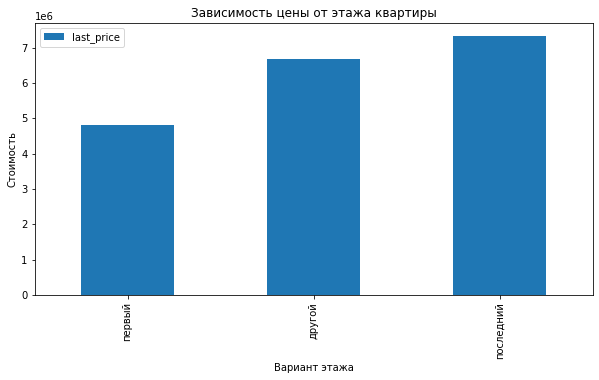

In [73]:
df_other.pivot_table(index='floor_variant', values='last_price').sort_values(by='last_price')\
.plot(y='last_price', kind='bar', figsize=(10, 5), title='Зависимость цены от этажа квартиры', xlabel='Вариант этажа', ylabel='Стоимость');

Вывод

Наибольшей стоимостью обладают квартиры на последнем этаже.
На первом этаже квартиры дешевле, чем на всех остальных.
Видимо люди стремятся к уединенности



 - Изучим зависимость цены от даты размещения
   - дня недели
   - месяца
   - года

Построим график на основе сводной таблицы


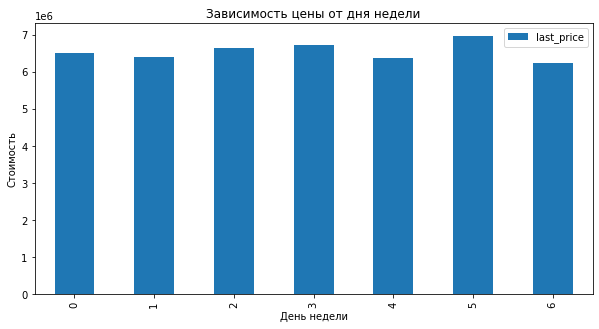

In [74]:
df_other.pivot_table(index='weekday_exposition', values='last_price').sort_values(by='weekday_exposition')\
.plot(y='last_price', kind='bar', figsize=(10, 5), title='Зависимость цены от дня недели'\
      , xlabel='День недели', ylabel='Стоимость');

Вывод

Небольшая зависимость от дня недели прослеживаетя. В субботу стоимость продаж самая высокая, а вот в воскресенье наоборот самая низкая. В среду и четверг цены на недвижимость чуть повыше, чем в остальные дни. 
В целом день недели не сильно влияет на стоимость 

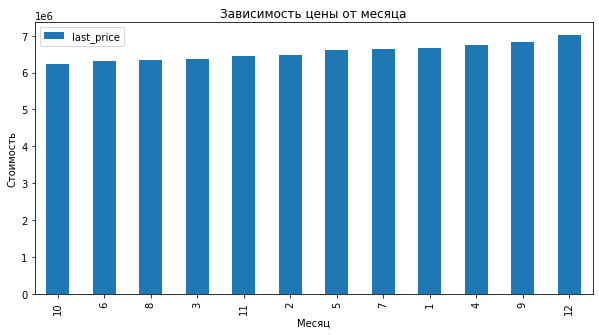

In [75]:
df_other.pivot_table(index='month_exposition', values='last_price').sort_values(by='last_price')\
.plot(y='last_price', kind='bar', figsize=(10, 5), title='Зависимость цены от месяца'\
      , xlabel='Месяц', ylabel='Стоимость');

Вывод

Традиционно месяц декабрь самый активный по покупкам и продажам. 
Стоимость квартир отличается в большую сторону от других месяцев. В октябре почти во всех сферах услуг наблюдается спад.
Цены на квартиры в октябре самые низкие. Летом в июне и августе люди больше сосредоточены на отдыхе. Цены на недвижимость в эти месяцы снижена
И все же месяц, также как и день недели вносит небольшие коррективы в стоимость продаж. Более заметна разница лишь у крайних значений

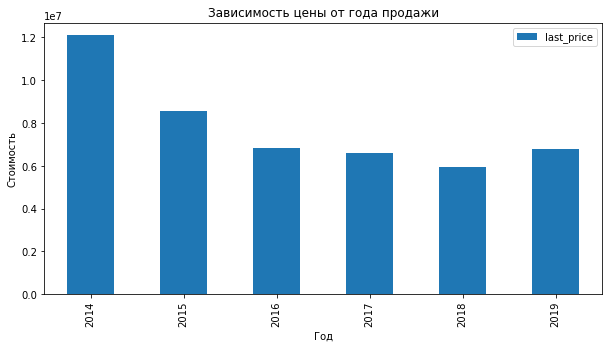

In [76]:
df_other.pivot_table(index='year_exposition', values='last_price').sort_values(by='year_exposition')\
.plot(y='last_price', kind='bar', figsize=(10, 5), title='Зависимость цены от года продажи'\
      , xlabel='Год', ylabel='Стоимость');

Вывод

В 2014 году стоимость жилья была существенно выше, чем в последующие годы. Возможно, ввод нового жилья привел к значительному удешевлению. В 2015 наблюдаем значительное снижение стоимости. И далее вплоть до 2018 года квартиры неуклонно дешевели. В 2019 недвижимость заметно подорожала по сравнению с предыдущим годом.
Каждый год вносит свои коррективы в цены на недвижимость. Колебание цены в зависимости от года ярко выражено.



  -  **Выберем 10 населенных пунктов с наибольшим числом объявлений**

In [77]:
df_other.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10) #отсортировали населенные пункты

locality_name
санкт-петербург      15747
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [78]:
city_list = ['санкт-петербург', 'поселок мурино', 'поселок шушары', 'всеволожск', 'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'деревня кудрово', 'выборг']
  #  создали список       

In [79]:
df_other_city_top = df_other.query('locality_name == @city_list') # сделали срез по населенным пунктам
display(df_other_city_top.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,mid_price_metr,floor_variant,kitchen_total_area,living_total_area
0,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,25.0,санкт-петербург,16028.0,NaN,3,3,2019,120370.370370,другой,0.23,0.47
1,3350000.0,40.4,2018-12-04,1,2.730129,11.0,18.6,1,11.0,поселок шушары,18603.0,81.0,1,12,2018,82920.792079,первый,0.27,0.46
2,5196000.0,56.0,2015-08-20,2,2.730129,5.0,34.3,4,8.3,санкт-петербург,13933.0,558.0,3,8,2015,92785.714286,другой,0.15,0.61
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0,4,7,2015,408176.100629,другой,NaN,0.28
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0,1,6,2018,100000.000000,другой,0.41,0.32




Сформируем сводную таблицу, рассчитаем среднюю стоимость квадратного метра по населенным пунктам

In [80]:
df_other_city_top_pivot = df_other_city_top.pivot_table(index='locality_name', values='mid_price_metr') # сводная таблица
display(df_other_city_top_pivot.sort_values(by='mid_price_metr', ascending=False).round()) 

,mid_price_metr
locality_name,
санкт-петербург,114839.0
пушкин,103126.0
деревня кудрово,92474.0
поселок парголово,90176.0
поселок мурино,85682.0
поселок шушары,78677.0
колпино,75425.0
гатчина,68746.0
всеволожск,68654.0



**Вывод**

Самая высокая стоимость жилья в нашей выборке, в Санкт-Петербурге

Самая низкая в Выборге



**Определим границы центральной зоны**


  - Создадим столбец с расстоянием до центра в километрах
  
  - Посчитаем среднюю цену для каждого километра
 
  - Выделим квартиры в Санкт-Петербурге
 


In [81]:
df_other['cityCenters_nearest_km'] = (df_other['cityCenters_nearest'] * 0.001).round() # создаем столбец

In [82]:
df_other_peter = df_other.loc[df_other['locality_name'] == 'санкт-петербург'] # выбрали строки с квартирами с Санкт-Петербурге
display(df_other_peter.head()) #  проверили результат

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,mid_price_metr,floor_variant,kitchen_total_area,living_total_area,cityCenters_nearest_km
0,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,25.0,санкт-петербург,16028.0,NaN,3,3,2019,120370.370370,другой,0.23,0.47,16.0
2,5196000.0,56.0,2015-08-20,2,2.730129,5.0,34.3,4,8.3,санкт-петербург,13933.0,558.0,3,8,2015,92785.714286,другой,0.15,0.61,14.0
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0,4,7,2015,408176.100629,другой,NaN,0.28,7.0
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0,1,6,2018,100000.000000,другой,0.41,0.32,8.0
7,7915000.0,71.6,2019-04-18,2,2.730129,24.0,30.5,22,18.9,санкт-петербург,11634.0,NaN,3,4,2019,110544.692737,другой,0.26,0.43,12.0




Посчитаем среднюю цену  квадратного метра для каждого километра

In [83]:
df_other_peter_price_km = df_other_peter.pivot_table(index='cityCenters_nearest_km', values='mid_price_metr')
display(round(df_other_peter_price_km))  # создали сводную таблицу для рассчета

,mid_price_metr
cityCenters_nearest_km,
0.0,245834.0
1.0,176641.0
2.0,157944.0
3.0,121300.0
4.0,133036.0
5.0,140324.0
6.0,151012.0
7.0,156177.0
8.0,125520.0




 - Построим график зависимости цены от удаленности от центра

 - По графику определим центральную зону

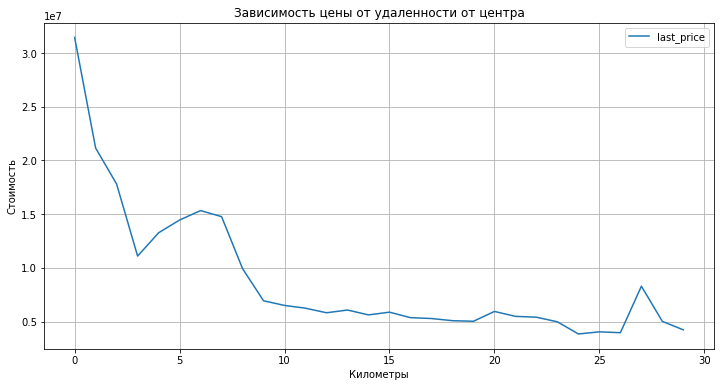

In [84]:
df_other_peter.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, figsize=(12, 6)\
                     , title='Зависимость цены от удаленности от центра', xlabel='Километры', ylabel='Стоимость');

Вывод

График начинает заметно идти вверх примерно в районе 8 км удаленности от центра.
Обозначим это расстояние центральной зоной






   **Выделим сегмент квартир в центре. Проанализируем эту территорию**

Изучим параметры

  - площадь
  - цена
  - число комнат
  - высота потолков

In [85]:
df_other_center = df_other.loc[df_other['cityCenters_nearest_km'] <= 8] # отфильтруем по расстоянию до центра
display(df_other_center.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition,mid_price_metr,floor_variant,kitchen_total_area,living_total_area,cityCenters_nearest_km
3,64900000.0,159.0,2015-07-24,3,2.730129,14.0,45.0,9,NaN,санкт-петербург,6800.0,424.0,4,7,2015,408176.100629,другой,NaN,0.28,7.0
4,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,41.0,санкт-петербург,8098.0,121.0,1,6,2018,100000.000000,другой,0.41,0.32,8.0
24,6500000.0,97.2,2015-10-31,2,2.730129,3.0,46.5,1,19.6,санкт-петербург,2336.0,265.0,5,10,2015,66872.427984,первый,0.20,0.48,2.0
35,15500000.0,149.0,2017-06-26,5,2.730129,5.0,104.0,4,17.0,санкт-петербург,3502.0,644.0,0,6,2017,104026.845638,другой,0.11,0.70,4.0
51,45000000.0,161.0,2017-10-17,3,3.200000,8.0,38.0,4,50.0,санкт-петербург,6589.0,541.0,1,10,2017,279503.105590,другой,0.31,0.24,7.0


In [86]:
df_other_center['total_area'].describe()  # изучим площадь

count    4140.000000
mean       90.282072
std        58.791790
min        12.000000
25%        55.000000
50%        76.000000
75%       107.000000
max       900.000000
Name: total_area, dtype: float64

Крайние значения в столбце сильно отличаются. Максимальное значение сильно контрастирует с остальными характеристиками.

Медиана и среднее значение в Питере выше, чем в общей базе. Цифры по квартилям тоже выше

Можно сказать, что в центре представлены квартиры с большей полощадью

Оставим прежний  диапзон от 12 до 200 для гистограммы. 



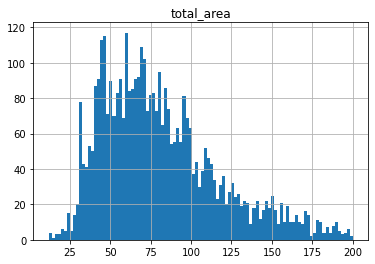

In [87]:
df_other_center.hist('total_area', bins=100, range=(12, 200)); 

Вывод

Квартир с площадью от 100 до 200 квадратных метров в центре представлены в большем количестве

От 30 до 80 квадратных метров - основная масса предложений.

Много квартир с небольшой площадью от 30 до 40 кватратных метров

Все же центр отличается более разнообразными предложениями в отношении площади. 

Квартиры с большой площадью представлены гораздо шире, чем в общей базе.


<a id='areapet'></a>

In [88]:
df_other_center['last_price'].describe() # изучим параметр цена

count    4.140000e+03
mean     1.415791e+07
std      2.353420e+07
min      1.600000e+06
25%      6.450000e+06
50%      8.950000e+06
75%      1.390000e+07
max      7.630000e+08
Name: last_price, dtype: float64

Показатель стоимости  демострирует сильный контраст в крайних значениях

По величине стандартного отклонения можем сказать о сильных выбросах

По числовому описанию сразу заметно, квартиры в центре намного дороже. 

Среднее и медианное значения в два раза больше по сравнению с общей базой


Построим гистограмму. Расширим границы диапазона.

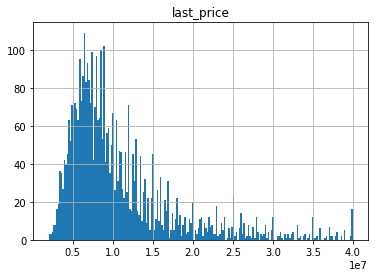

In [89]:
df_other_center.hist('last_price', bins=200, range=(2000000, 40000000));

Вывод

Основная масса объявлений предлагает квартиры со стоимостью от 5 до 7 млн, в отличие от 3 - 4 млн по общей базе

Ниже по частотности от 4 млн до 9 млн, по общей 2,5 - 5 млн

Жилье со стоимостью 2 млн встречается реже, чем объявления ценой от 15 млн до 30 млн

Квартир по стоимостью от 30 млн до 40 млн немногочислены, но  но также представлены, по общей это была цифра 10 - 20 млн



In [90]:
df_other_center['rooms'].describe()   # изучим параметр количество комнат

count    4140.000000
mean        2.763527
std         1.415366
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

В описательной характеристике столбца средние значение почти совпадает с медианным

Стандартное отклонение указывает на присутствие выбросов.

Среднее и медианное значение по колличеству комнат в центре больше, чем в общей базе


<a id='roomspet'></a>

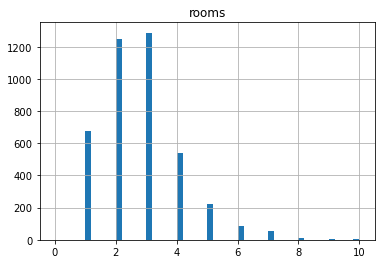

In [91]:
df_other_center.hist('rooms', bins=50, range=(0, 10));

**Вывод**

Больше всего предложений о продаже 2 и 3 комнатных квартир. В общей базе активнее продавались 1 и 2 комнатные 

Предложений 3 и 4 комнатных квартир в центре больше, чем в общей базе

Далее прослеживается закономерность, чем больше комнат, тем меньше предложений о продаже.




In [92]:
df_other_center['ceiling_height'].describe() # изучим параметр высота потолков

count    4140.000000
mean        2.990871
std         1.720179
min         2.000000
25%         2.730129
50%         2.800000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

Максимальная и минимальная высота сильно отличаются. Но такие значения единичны.

Стандартное отклонение высокое из за крайних значений

В целом все значения в числовом описании высоты потолков в центре, медиана, среднее квартили выше чем для общей базы

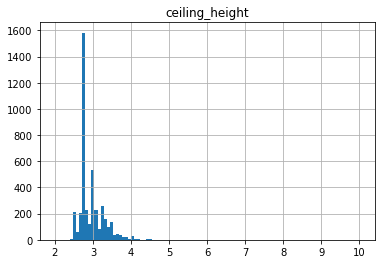

In [93]:
df_other_center.hist('ceiling_height', bins=100, range=(2, 10));

**Вывод**

Основная масса квартир в центре с высотой потолков 2,7 метра, как и в общей базе

Квартиры с более низкими потолками редкое явление, что отличается от общих значений.

И наоборот, в центре квартиры с высотой потолков 3 - 3,5  метра более широко представлены в продажах





-  **Изучим факторы влияющие на стоимость квартиры.**

Рассмотрим соотношение

  -  цены и числа комнат
  
  -  цены и удаленности от центра
  
  Рассчитаем коэффициент корреляции между этими величинами и построим матрицу диаграмм рассеяния
  
  
  Отберем в отдельную таблицу столбцы с нужными данными.



In [94]:
df_other_center_cor = df_other[['rooms', 'cityCenters_nearest', 'last_price']] # создали отдельную таблицу
df_other_center_cor.head()

,rooms,cityCenters_nearest,last_price
0,3,16028.0,13000000.0
1,1,18603.0,3350000.0
2,2,13933.0,5196000.0
3,3,6800.0,64900000.0
4,2,8098.0,10000000.0


In [95]:
df_other_center_cor.corr() # считаем коэффициент

,rooms,cityCenters_nearest,last_price
rooms,1.000000,-0.091518,0.365209
cityCenters_nearest,-0.091518,1.000000,-0.156048
last_price,0.365209,-0.156048,1.000000


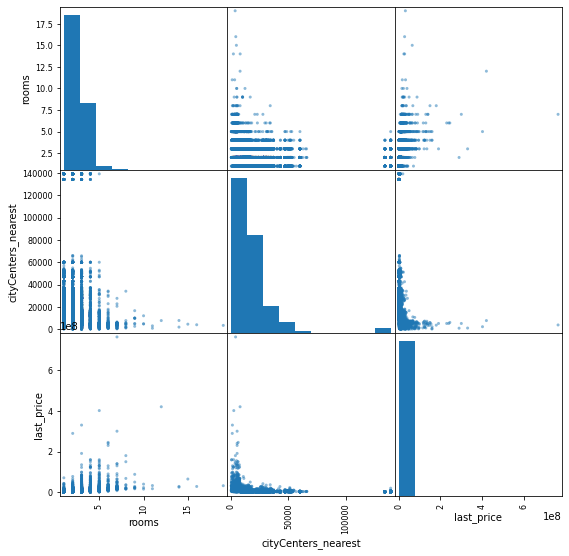

In [96]:
pd.plotting.scatter_matrix(df_other_center_cor, figsize=(9, 9));

**Вывод**


В соотношении количества комнат и цены корреляция положительная, но ниже среднего. 

Соотношение цены и удаленности от центра характеризуется отрицательной, очень слабой корреляцией. Чем дальше от центра, тем ниже цена. Но зависимость минимальная.

Диаграмма рассеяния подтверждает цифры

Соотнношения посчитались одинаковые и для центра и для общей базы   <a id='correlpeter'></a>


 - **Изучим зависимость цены от того на каком этаже расположена квартира**
     - построим графики на основании расчета сводной таблицы.
     - построим графики с наложением общей базы и центра

In [97]:
df_other_pivot = df_other.pivot_table(index='floor_variant', values='last_price').sort_values(by='last_price')
df_other_center_pivot = df_other_center.pivot_table(index='floor_variant', values='last_price').sort_values(by='last_price')

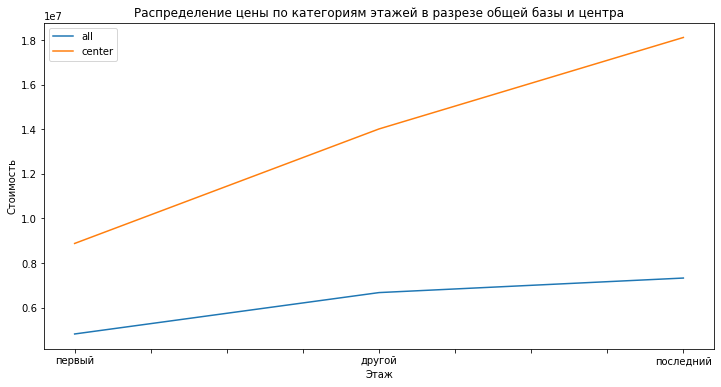

In [98]:
ax = df_other_pivot.plot(
    y='last_price',
    label='all',)
df_other_center_pivot.plot(
    y='last_price',
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по категориям этажей в разрезе общей базы и центра'\
      , xlabel='Этаж', ylabel='Стоимость'
); 

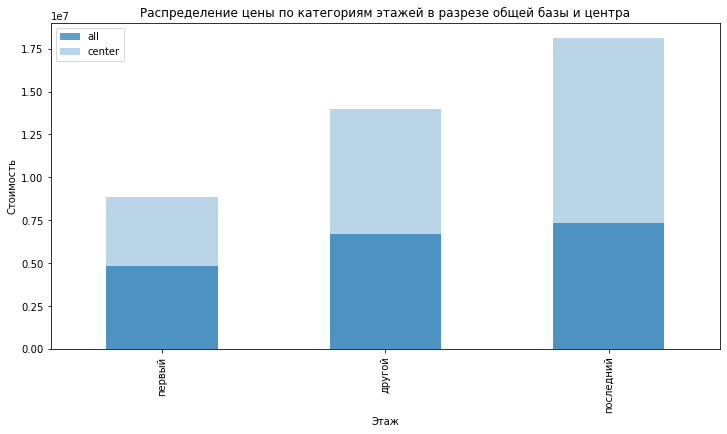

In [99]:
ax = df_other_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.7,
    label='all',
)
df_other_center_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.3,
    label='center',
    ax=ax,
    legend=True,  figsize=(12, 6), title='Распределение цены по категориям этажей в разрезе общей базы и центра'\
      , xlabel='Этаж', ylabel='Стоимость'
);


**Вывод**

В центре последний этаж еще дороже по сравнению с остальными, чем в общей базе. 
Первый этаж также не пользуется популярностью.  Стоимость его в соотношении с другими двумя категориями еще более низкая.
То есть характер распределения одинаковый, но стоимость в центре более, чем в 2 раза выше.



 - Изучим зависимость цены от даты размещения

   - дня недели
   - месяца
   - года
 
 Построим графики, чтобы охарактеризовать соотношения
  
  

In [100]:
df_other_pivot = df_other.pivot_table(index='weekday_exposition', values='last_price').sort_values(by='weekday_exposition')
df_other_center_pivot = df_other_center.pivot_table(index='weekday_exposition', values='last_price').sort_values(by='weekday_exposition')

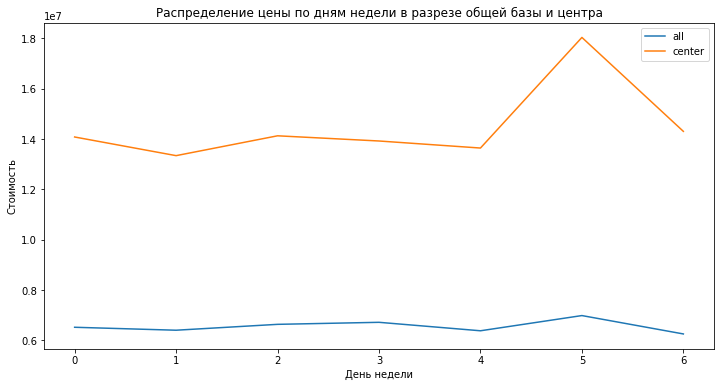

In [101]:
ax = df_other_pivot.plot(
    y='last_price',
    label='all',)
df_other_center_pivot.plot(
    y='last_price',
    label='center',
    ax=ax,
    legend=True,  figsize=(12, 6), title='Распределение цены по дням недели в разрезе общей базы и центра'\
      , xlabel='День недели', ylabel='Стоимость'
); 

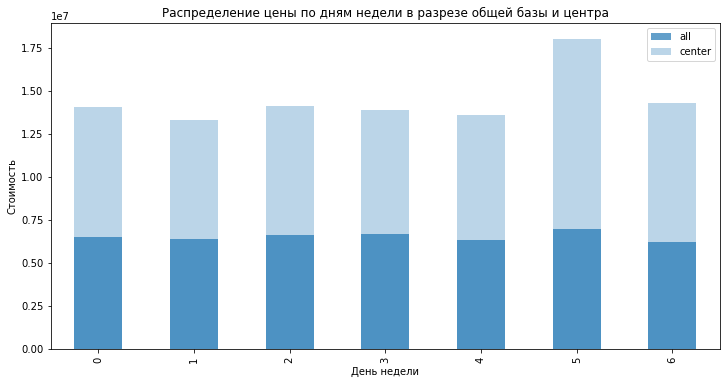

In [102]:
ax = df_other_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.7,
    label='all',
)
df_other_center_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.3,
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по дням недели в разрезе общей базы и центра'\
      , xlabel='День недели', ylabel='Стоимость'
); 


**Вывод**

Для центра еще более характерно повышение цен на недвижимость именно в субботу. В воскресенье заметен спад, но все же это второй активный день по стоимости продаж, в отличие от общей базы, где это четверг.
В отношении остальных дней недели зависимость стоимости от дня продажи не сильно заметна.

В центре стоимость в 2 раза выше.

In [103]:
df_other_pivot = df_other.pivot_table(index='month_exposition', values='last_price').sort_values(by='month_exposition')
df_other_center_pivot = df_other_center.pivot_table(index='month_exposition', values='last_price').sort_values(by='month_exposition')

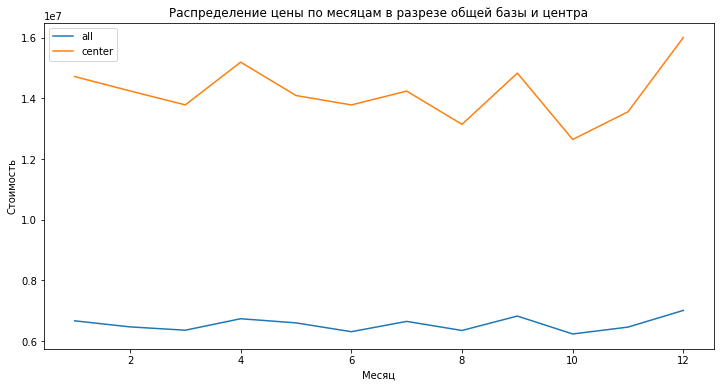

In [104]:
ax = df_other_pivot.plot(
    y='last_price',
    label='all',)
df_other_center_pivot.plot(
    y='last_price',
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по месяцам в разрезе общей базы и центра'\
      , xlabel='Месяц', ylabel='Стоимость'
);

In [105]:
df_other_pivot = df_other.pivot_table(index='month_exposition', values='last_price').sort_values(by='last_price')
df_other_center_pivot = df_other_center.pivot_table(index='month_exposition', values='last_price').sort_values(by='last_price')

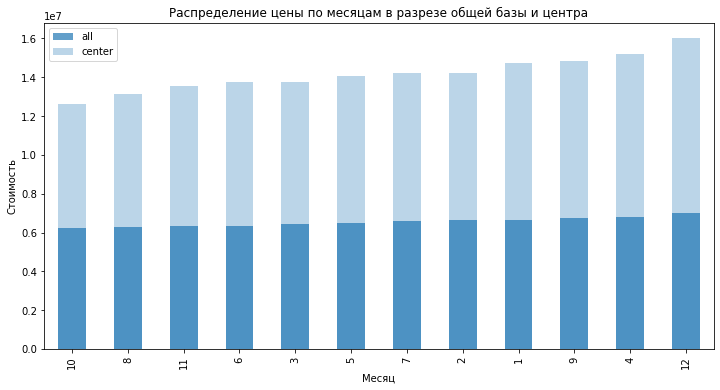

In [106]:
ax = df_other_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.7,
    label='all',
)
df_other_center_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.3,
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по месяцам в разрезе общей базы и центра'\
      , xlabel='Месяц', ylabel='Стоимость'
); 


**Вывод**

Зависимость стоимости от месяца продаж в центре и общей базе отмечается общими тенденциями. Подъем в декабре, спад в октябре. Сентябрь, апрель и декабрь, - самые дороги месяцы по продажам. Летом, - в августе и июне заметно снижение цены.
Разница заметна в том, что значения более контрастны. В центре города сезонность заметнее влияет на стоимость, чем в выборке по общей базе

In [107]:
df_other_pivot = df_other.pivot_table(index='year_exposition', values='last_price').sort_values(by='year_exposition')
df_other_center_pivot = df_other_center.pivot_table(index='year_exposition', values='last_price').sort_values(by='year_exposition')

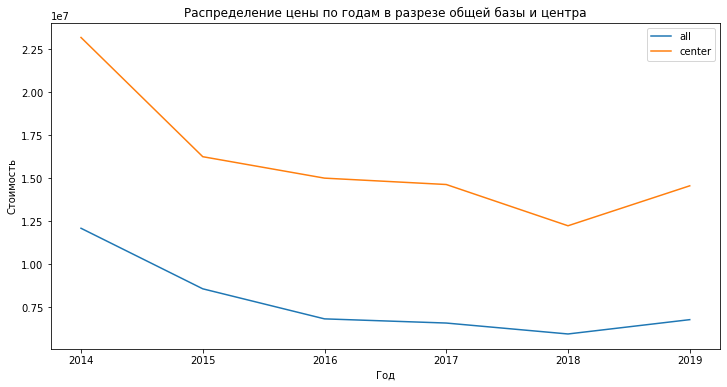

In [108]:
ax = df_other_pivot.plot(
    y='last_price',
    label='all',)
df_other_center_pivot.plot(
    y='last_price',
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по годам в разрезе общей базы и центра'\
      , xlabel='Год', ylabel='Стоимость'
); 

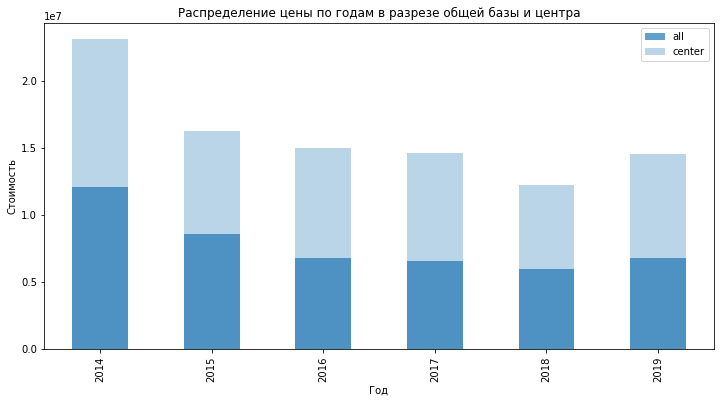

In [109]:
ax = df_other_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.7,
    label='all',
)
df_other_center_pivot.plot(
    kind='bar',
    y='last_price',
    alpha=0.3,
    label='center',
    ax=ax,
    legend=True, figsize=(12, 6), title='Распределение цены по годам в разрезе общей базы и центра'\
      , xlabel='Год', ylabel='Стоимость'
); 

**Вывод**

Зависимость цены от года продаж в центре и в общей базе в целом такая же. Есть небольшие отличия. Стоимость жилья в центре с 2014 на 2015 снизилась сильнее. А с 2018 на 2019 год сильнее выросла.




## Общий вывод

Задача данного исследования состояла в том, чтобы проанализировать архив объявлений о продаже квартир в Санкт-Петербурге и

соседних населенных пунктах за несколько лет. 

**На основании исследования установить параметры для определения рыночной цены недвижимости**

**На начальном этапе ознакомились с данными и изучили.**

 - В исходной таблице 22 колонки. Только 8 колонок без пропусков
 
 - В колонках, где это уместно пропуски заполнили нулями
 
 - В колонках, где было возможно, постарались восстановить данные
 
     - Высоту потолков заменили медианным значением 
     
     - Расстояние до центра нашли в интернете, заменили пропуски
   
 - В колонках, где не удалось найти корректную замену, пропуски оставили.
 
 - Изменили тип данных
 
 - Проверили таблицу на дубликаты.


**На основе исходного датафрейма создали новую таблицу, оставили колонки необходимые для исследования**
   
 
  - **Рассчитали и добавили в таблицу новые колонки**
 
       - цену квадратногог метра
   
       - день недели месяц и год публикации объявления
   
       - разделили этажи на категории первый, последний, другой
   
**В соответствии, с задачей исследования изучили и характеризовали параметры**

 - площадь
 - цена
 - число комнат 
 - высота потолков
 - изучили время продажи квартиры
 
**Далее изучили соотношения, как зависит цена от:**

 - площади 
 - числа комнат
 - удаленности от центра 
 - категории этажа
 - даты размещения объявления
 
Для этого рассчитали коэффициент корреляции и построили матрицу диаграмм рассеяния. 

Построили графики, чтобы проанализировать нелинейную зависимость

**Выделили центральную зону Санкт-Петербурга** 

**Изучили как данные параметры и соотношения характеризуются для центральной зоны**

*В процессе исследования, получили дополнительную информацию*

 - Выбрали 10 населенных пунктов с наибольшим числом объявлений
 - Посчитали среднюю стоимость квадратного метра
 - Выделил пункты с самой высокой и низкой стоимостью жилья

**По результатам работы можно охарактеризовать следующие параметры влияющие на стоимость жилья:**

 - Удаленность от центра. В центре Санкт-Петербурга стоимость практически в 2 раза выше.

 - Площадь квартиры. В центре она отличается более разнообразными предложениями. Квартиры с большой площадью представлены гораздо шире, чем в общей базе
 .
 - Количество комнат Больше всего предложений о продаже 2 и 3 комнатных квартир. В общей базе активнее продавались 1 и 2 комнатные Предложений 3 и 4 комнатных квартир в центре больше, чем в общей базе.
 
 - Высота потолков. Основная масса квартир в центре с высотой потолков 2,7 метра, как и в общей базе. В центре квартиры с высотой потолков 3 - 3,5  метра более широко представлены в продажах.
 
 - Этаж квартиры. Последний этаж дороже по сравнению с остальными Первый этаж не пользуется популярностью. Стоимость его в соотношении с другими двумя категориями более низкая. Это характерно и для общей базы и для центра.
 
 - День недели. В будни зависимость стоимости от дня продажи не сильно заметна. Для центра характерно большее повышение цен на недвижимость субботу. В воскресенье заметен спад, но все же это второй активный день по стоимости продаж, в отличие от общей базы, где это четверг.
 
 - Месяц продажи. Зависимость стоимости от месяца продаж в центре и общей базе отмечается общими тенденциями. Подъем в декабре, спад в октябре. Сентябрь, апрель и декабрь, - самые дорогие месяцы по продажам. Летом, - в августе и июне заметно снижение цены. В центре города сезонность заметнее влияет на стоимость, чем в выборке по общей базе.
 
 - Год продажи. Каждый год вносит свои коррективы в цены на недвижимость. Колебание цены в зависимости от года ярко выражено. В 2014 году стоимость жилья была существенно выше, чем в последующие годы. В 2015 наблюдаем значительное снижение стоимости. И далее вплоть до 2018 года квартиры неуклонно дешевели. В 2019 недвижимость заметно подорожала.
